In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import dataset

path = r'C:\Users\X1\Instacart Basket Analysis Master'
ords_prods_merge = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'orders_products_merged_updated_1.pkl'))

In [3]:
ords_prods_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price_spent,spending_flag,median_days,frequent_customer_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


In [4]:
ords_prods_merge.shape

(32434212, 24)

<Axes: xlabel='orders_day_of_week'>

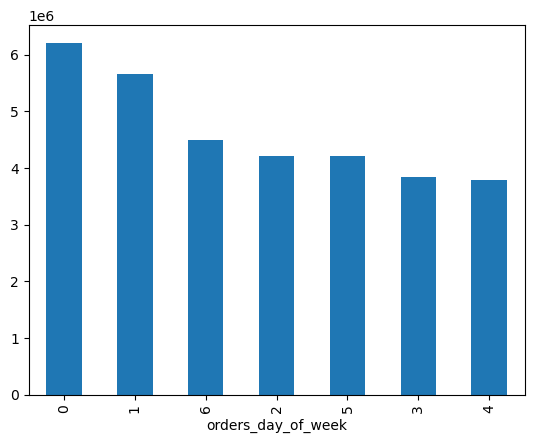

In [5]:
# Create bar chart with column orders_day_of_week
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

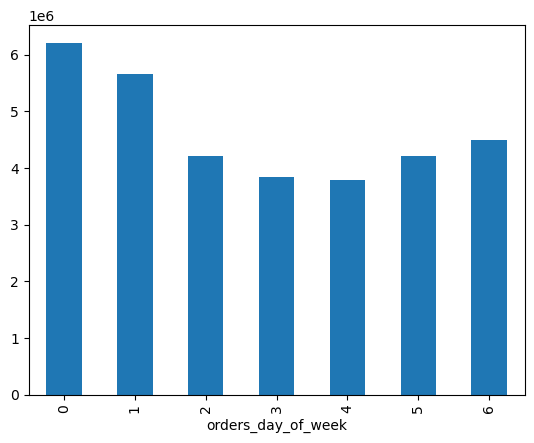

In [6]:
# Instead of largest to smallest, sort by their index order

bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

### This same trick can actually be used when printing frequencies, as well:


In [7]:
# Check frequency of orders_day_of_week

ords_prods_merge['orders_day_of_week'].value_counts()

orders_day_of_week
0    6209632
1    5665830
6    4500246
2    4217766
5    4209449
3    3844096
4    3787193
Name: count, dtype: int64

In [8]:
# Sort by index order

ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    6209632
1    5665830
2    4217766
3    3844096
4    3787193
5    4209449
6    4500246
Name: count, dtype: int64

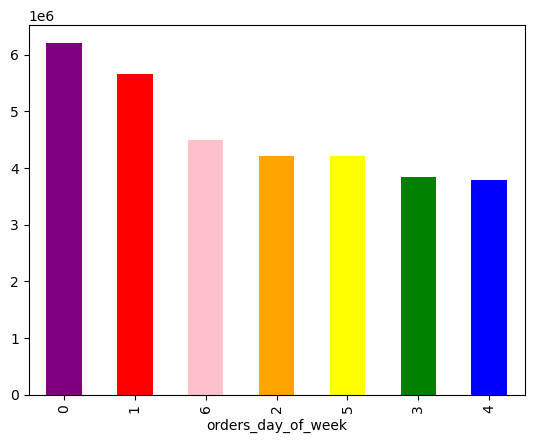

In [9]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

### Above is  a preview, but didn't actually save to Jupyter

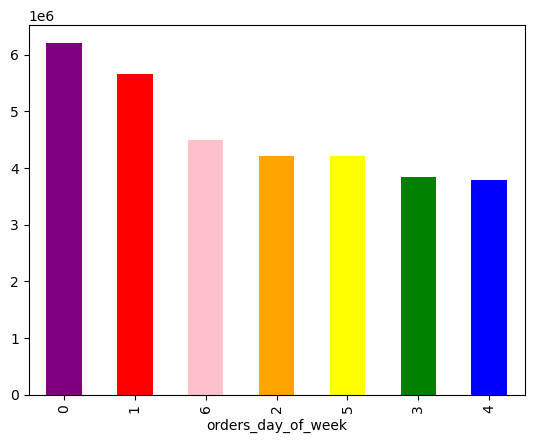

In [10]:
# Assign the color chart to bar so it saves to Jupyter
#Execute twice?

bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [11]:
# Export this colored bar chart. Access it by calling bar.figure
# To export in form of an image file, use figure.savefig()

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

## Histograms

<Axes: ylabel='Frequency'>

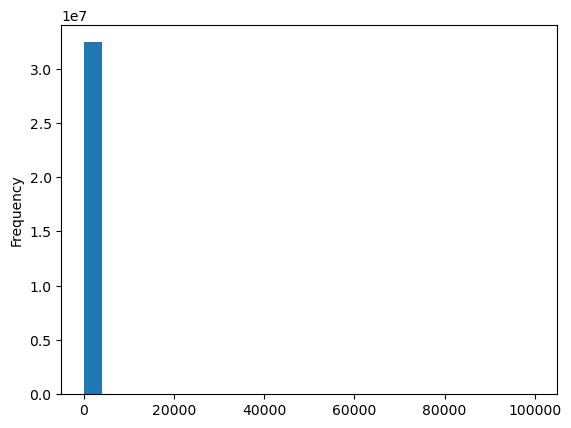

In [12]:
#Histogram of the 'prices' column

ords_prods_merge['prices'].plot.hist(bins = 25)

### This is incorrect, should be 25 bars - one for each bin

In [13]:
# Check the stats of 'prices' column

ords_prods_merge['prices'].describe()

count    3.243421e+07
mean     1.198114e+01
std      4.954311e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

### The MAX is odd

In [14]:
# Further investigate

ords_prods_merge['prices'].mean()

11.98114392296625

In [15]:
ords_prods_merge['prices'].median()

7.4

In [16]:
ords_prods_merge['prices'].max()

99999.0

### How could an item cost $99,999.00?

<Axes: xlabel='prices', ylabel='prices'>

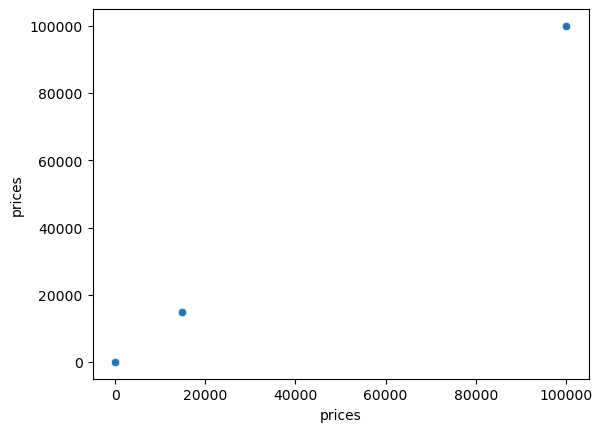

In [17]:
# Create scatterplot to check if any outliers

sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [18]:
# Determine whtether there are any values above a certain threshold

ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price_spent,spending_flag,median_days,frequent_customer_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29193268,2249946,204099,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29193269,2363282,204099,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,...,High-range product,Busiest day,Busiest days,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29193270,3181945,204395,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,...,High-range product,Regularly busy,Slowest days,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
29193271,2486215,205227,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,...,High-range product,Regularly busy,Slowest days,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


### For now, let’s mark them as missing since they don’t make sense in terms of the other values in the column.

In [19]:
# Turn values over 100 as missing values
# Replace outliers with NaNs

ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [21]:
# Check if change was successful

ords_prods_merge['prices'].max()

25.0

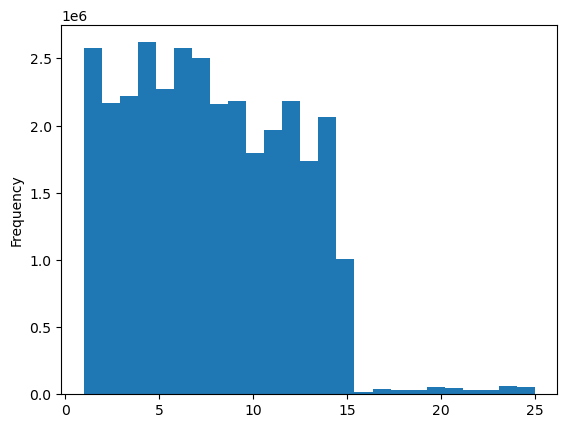

In [22]:
# Retry histogram of 'prices' column

hist = ords_prods_merge['prices'].plot.hist(bins = 25)

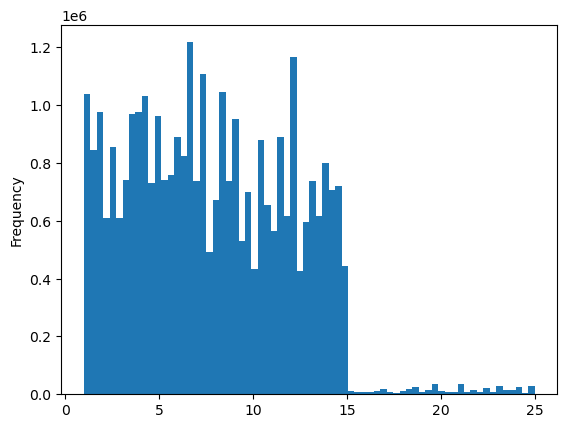

In [23]:
# Increase bins to 70 for more thinner columns

hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [24]:
# Export as hist

hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_prices.png'))

# Sampling

In [25]:
# There is too much data to create a line chart, would cause crash
# Sample the datafram using 70/30 split

np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [26]:
dev

array([False,  True, False, ..., False,  True,  True])

In [28]:
# How many rows are in the ords_prods_merge dataframe?

len(ords_prods_merge)

32434212

In [27]:
np.random.rand(10)

array([0.16891835, 0.04368635, 0.41602642, 0.88973306, 0.66299301,
       0.78345326, 0.02169353, 0.79078115, 0.45980038, 0.17173956])

In [30]:
# Create a list holding True/False values to the test np.random.rant() <=0.7

dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [31]:
# Store 70% of the sample in the dataframe big

big = ords_prods_merge[dev]

In [32]:
# Store 30% of the sample in the dataframe small

small = ords_prods_merge[~dev]

## Double check if it worked correctly

In [34]:
len(ords_prods_merge)

32434212

In [35]:
len(big) + len(small)

32434212

In [36]:
# Reduce samples to only columns necessary for the chart: “prices” & “orders_day_of_week”

df_2 = small[['orders_day_of_week','prices']]

C:\Users\X1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\X1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


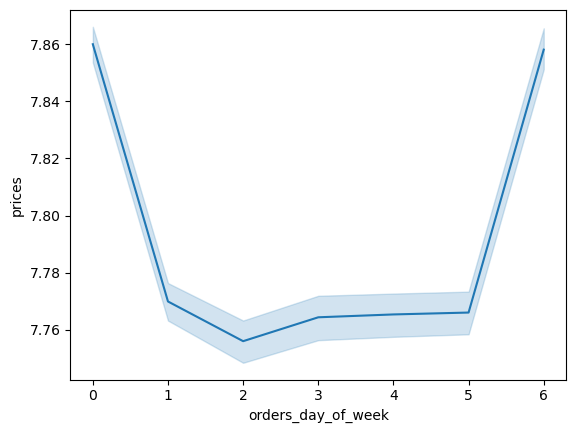

In [37]:
# Create line chart

line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')